In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn import datasets
import os
from sklearn.datasets import make_blobs

In [17]:
blob_centers = np.array(
    [[ -0.5,  -0.5],
     [-1.5 ,  2.5],
     [-3.0,  0.5],
     [-3.3,  2.8],
     [-2.7,  -1.0]])
blob_std = np.array([0.3, 0.3, 0.15, 0.3, 0.2])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

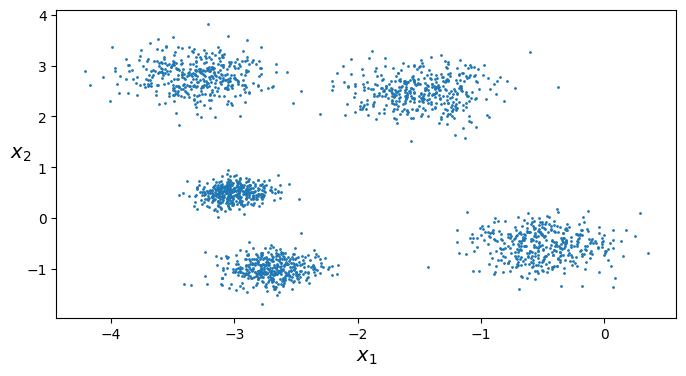

In [18]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)


plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [19]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [20]:
y_pred

array([4, 1, 2, ..., 3, 2, 1], dtype=int32)

In [22]:
y_pred is kmeans.labels_

True

In [23]:
# The following 5 centroid were calculated:
kmeans.cluster_centers_

array([[-1.48294779,  2.48935087],
       [-3.01058702,  0.50070595],
       [-0.49990581, -0.53403394],
       [-3.30280425,  2.79450491],
       [-2.70044418, -0.99728389]])

In [24]:
kmeans.labels_

array([4, 1, 2, ..., 3, 2, 1], dtype=int32)

In [25]:
# Predict the labels for new instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 2, 3, 3], dtype=int32)